In [1]:
import pandas as pd
import numpy as np


In [5]:
### Timestamp

In [8]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [9]:
### Period

In [12]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [13]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [14]:
### DatetimeIndex


In [16]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [18]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

In [19]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [20]:
### Converting to Datetime

In [21]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,73,49
"Aug 29, 2014",32,30
2015-06-26,36,42
7/12/16,88,72


In [22]:
ts3.index = pd.to_datetime(ts3.index)
ts3


,a,b
2013-06-02,73,49
2014-08-29,32,30
2015-06-26,36,42
2016-07-12,88,72


In [23]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [24]:
### Timedeltas

In [26]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')


Timedelta('2 days 00:00:00')

In [27]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

In [28]:
### Working with Dates in a DataFrame

In [29]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [30]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,109,118
2016-10-16,112,122
2016-10-30,115,117
2016-11-13,112,122
2016-11-27,111,128
2016-12-11,109,128
2016-12-25,107,119
2017-01-08,111,124
2017-01-22,112,118


In [31]:
df.index.weekday_name


array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [32]:
df.diff()


,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,3.0,4.0
2016-10-30,3.0,-5.0
2016-11-13,-3.0,5.0
2016-11-27,-1.0,6.0
2016-12-11,-2.0,0.0
2016-12-25,-2.0,-9.0
2017-01-08,4.0,5.0
2017-01-22,1.0,-6.0


In [33]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,112.0,119.0
2016-11-30,111.5,125.0
2016-12-31,108.0,123.5
2017-01-31,111.5,121.0


In [34]:
df['2017']

,Count 1,Count 2
2017-01-08,111,124
2017-01-22,112,118


In [35]:
df['2016-12']

,Count 1,Count 2
2016-12-11,109,128
2016-12-25,107,119


In [36]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,128
2016-12-25,107,119
2017-01-08,111,124
2017-01-22,112,118


In [39]:
# forward fill fills in missing values
df.asfreq('W', method= 'ffill')

,Count 1,Count 2
2016-10-02,109,118
2016-10-09,109,118
2016-10-16,112,122
2016-10-23,112,122
2016-10-30,115,117
2016-11-06,115,117
2016-11-13,112,122
2016-11-20,112,122
2016-11-27,111,128
2016-12-04,111,128


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


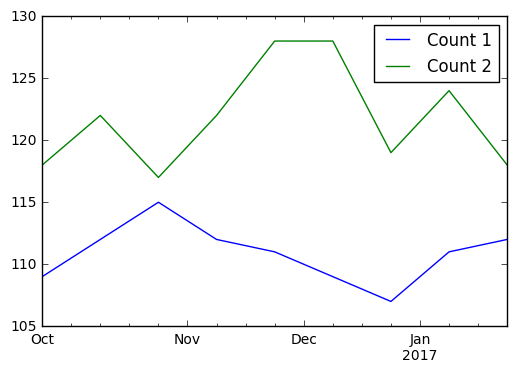

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()